In [1]:
#Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import iqr
from scipy.stats import linregress
import numpy as np


In [2]:
# Read in the collision violations data set
collision = pd.read_csv('pd_collisions_datasd_v1.csv')
collision.head()

,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,180282,2018-01-01 00:30:00,124,6500,,EL CAMINO DE TEATRO,,,,,22350,VC,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,NaN
1,180310,2018-01-01 01:00:00,616,500,,ROSECRANS,STREET,,,,22350,VC,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,0,0,MISDEMEANOR
2,180573,2018-01-01 01:26:00,721,0,,PALM,AVENUE,,18TH,STREET,21954A,VC,PEDESTRIANS OUTSIDE CROSSWALKS,0,1,NaN
3,180317,2018-01-01 02:05:00,512,3100,,LOGAN,AVENUE,,,,22450(A),VC,STOP REQUIREMENTS STATE STOP LINE,0,0,MISDEMEANOR
4,180319,2018-01-01 02:26:00,439,6200,,DIVISION,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


In [3]:
#What is total # of collisions involving pedestrians, bicyclists, and other motor vehicles - 2018-2019?
#Bar Charts
#Assinged to: Alex

#Create new dataframe to pull data from 
df = pd.DataFrame(collision)
df

#Split the date_time column into two columns
date_time = df.date_time.str.split(expand=True)
date_time = date_time.rename(columns={0:'Date', 1:'Time'})
date_time

#Pull just the charge_desc columns
charges = df["charge_desc"]
charges_df =pd.DataFrame(charges)
charges_df = charges_df.rename(columns={0:"charge_desc"})
charges_df

#Merge charge_desc, time and date columns into one dataframe
dt_charges = charges_df.merge(date_time, left_index=True, right_index=True)
dt_charges


,charge_desc,Date,Time
0,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,2018-01-01,00:30:00
1,VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR ...,2018-01-01,01:00:00
2,PEDESTRIANS OUTSIDE CROSSWALKS,2018-01-01,01:26:00
3,STOP REQUIREMENTS STATE STOP LINE,2018-01-01,02:05:00
4,TURNING MOVEMENTS AND REQUIRED SIGNALS,2018-01-01,02:26:00
...,...,...,...
21752,FOLLOWING TOO CLOSELY (I),2020-03-12,07:09:00
21753,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),2020-03-12,07:30:00
21754,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,2020-03-12,12:14:00
21755,SIGNAL LIGHTS:CIRCULAR RED (I),2020-03-12,17:45:00


In [4]:
#2018 Data Analysis

#Pull out 2018 only data
twenty_18 = dt_charges[dt_charges["Date"].str.contains("2018")]
twenty_18

#Total # of collisions
total_crashes18 = twenty_18["charge_desc"].count()

#Word search charge_desc column for descriptions invovling Bikes and counting those number.
bike_words = ["BIKE", "BICYCLE", "BICYCLIST", "BICYCLES", "BIKES"]
bikes = twenty_18[twenty_18['charge_desc'].str.contains("|".join(bike_words))]
bike_crashes18 = bikes["charge_desc"].count()

#Word search charge_desc column for descriptions invovling pedestrians
pedestrians = twenty_18[twenty_18['charge_desc'].str.contains("PEDESTRIAN|PEDESTRIANS")]
ped_crashes18 = pedestrians["charge_desc"].count()

#Calculate crashes with other motor vehicles, assuming all other collisions not invovling bikes or peds are with other vehicle.
cars18 = total_crashes18 - (bike_crashes18 + ped_crashes18)

print(f"The number of collisions with bikes: {bike_crashes18}")
print(f"The number of collisions with pedestrian: {ped_crashes18}")
print(f"The number of collisions with cars: {cars18}")
print(f"Total #: {total_crashes18}")



The number of collisions with bikes: 43
The number of collisions with pedestrian: 434
The number of collisions with cars: 9429
Total #: 9906


In [5]:
# 2019 Data Analysis

#Pull out 2019 only data
twenty_19 = dt_charges[dt_charges["Date"].str.contains("2019")]
twenty_19

#Total # of collisions
total_crashes19 = twenty_19["charge_desc"].count()

#Word search charge_desc column for descriptions invovling Bikes and counting those number.
bike_words = ["BIKE", "BICYCLE", "BICYCLIST", "BICYCLES", "BIKES"]
bikes = twenty_19[twenty_19['charge_desc'].str.contains("|".join(bike_words))]
bike_crashes19 = bikes["charge_desc"].count()

#Word search charge_desc column for descriptions invovling pedestrians
pedestrians = twenty_19[twenty_19['charge_desc'].str.contains("PEDESTRIAN|PEDESTRIANS")]
ped_crashes19 = pedestrians["charge_desc"].count()

#Calculate crashes with other motor vehicles, assuming all other collisions not invovling bikes or peds are with other vehicle.
cars19 = total_crashes19 - (bike_crashes19 + ped_crashes19)

print(f"The number of incidents with bikes: {bike_crashes19}")
print(f"The number of incidents with pedestrian: {ped_crashes19}")
print(f"The number of incidents with cars: {cars19}")
print(f"Total #: {total_crashes19}")

The number of incidents with bikes: 66
The number of incidents with pedestrian: 306
The number of incidents with cars: 9721
Total #: 10093


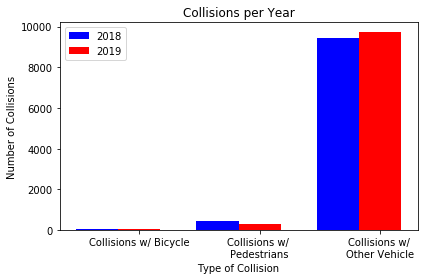

In [6]:
#Plot collision data 2018 vs. 2019

groups = 3

year18 =(bike_crashes18, ped_crashes18, cars18)

year19 = (bike_crashes19, ped_crashes19, cars19)

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.35

bar1 = plt.bar(index, year18, bar_width, color='b', label="2018")

bar2 = plt.bar(index + bar_width, year19, bar_width, color='r', label="2019")

plt.xlabel('Type of Collision')
plt.ylabel('Number of Collisions')
plt.title('Collisions per Year')
plt.xticks(index + bar_width, ('Collisions w/ Bicycle', 'Collisions w/ \nPedestrians', 'Collisions w/ \nOther Vehicle'))
plt.legend()
plt.tight_layout()
#plt.savefig("Bar1.png")

* In order to find this data I used the Charges Description column of the csv file, which is the "Violation section description for primary collision factor." Using Pandas and this column of data, I set word search parameters on substrings within the column of data to find collision that involved bikes and pedestrians. We assumed all other collisions invovled motor vehicle with motor vehicle. For exmple, for Bikes, I ran a word search to only give me rows that included the word, "bike, bicycle, bicyclist, and bikes" and for Pedestrians, I searched Pedestrians.

* Difficulties. It was difficult to know if my search parameter where all encompassing. So what I did was test one parameter at a time to see what it generated. 

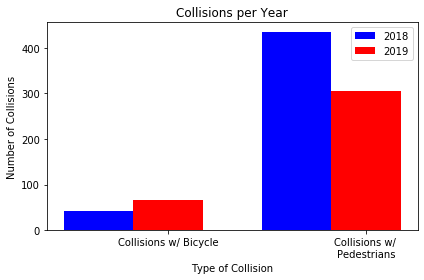

In [7]:
#Plot collision data involving Bike vs. Peds for 2018 v. 2019 to better show the data presented above.

groups = 2

year18 =(bike_crashes18, ped_crashes18)

year19 = (bike_crashes19, ped_crashes19)

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.35

bar1 = plt.bar(index, year18, bar_width, color='b', label="2018")

bar2 = plt.bar(index + bar_width, year19, bar_width, color='r', label="2019")

plt.xlabel('Type of Collision')
plt.ylabel('Number of Collisions')
plt.title('Collisions per Year')
plt.xticks(index + bar_width, ('Collisions w/ Bicycle', 'Collisions w/ \nPedestrians', 'Collisions w/ \nOther Vehicle'))
plt.legend()
plt.tight_layout()
#plt.savefig("Bar2.png")

In [8]:
# 2020 Data Analysis 

#Pull out 2020 data only 
twenty_20 = dt_charges[dt_charges["Date"].str.contains("2020")]
twenty_20

#Count total number of crashes
total_crashes20 = twenty_20["charge_desc"].count()

#Word search charge_desc column for descriptions invovling Bikes and counting those number.
bike_words = ["BIKE", "BICYCLE", "BICYCLIST", "BICYCLES", "BIKES"]
bikes = twenty_20[twenty_20['charge_desc'].str.contains("|".join(bike_words))]
bike_crashes20 = bikes["charge_desc"].count()

#Word search charge_desc column for descriptions invovling pedestrians
pedestrians = twenty_19[twenty_19['charge_desc'].str.contains("PEDESTRIAN|PEDESTRIANS")]
ped_crashes20 = pedestrians["charge_desc"].count()

#Calculate crashes with other motor vehicles, assuming all other collisions not invovling bikes or peds are with other vehicle.
cars20 = total_crashes20 - (bike_crashes20 + ped_crashes20)

print(f"The number of incidents with bikes: {bike_crashes20}")
print(f"The number of incidents with pedestrian: {ped_crashes20}")
print(f"The number of incidents with cars: {cars20}")
print(f"Total #: {total_crashes20}")

The number of incidents with bikes: 9
The number of incidents with pedestrian: 306
The number of incidents with cars: 1443
Total #: 1758


In [9]:
#2018- Jan. - Feb.

#Pull out 2018- Jan. - Feb. data only 
jan_feb18 = twenty_18[twenty_18["Date"].str.contains("2018-01|2018-02")]
jan_feb18

total_crashes18 = jan_feb18["charge_desc"].count()

bike_words = ["BIKE", "BICYCLE", "BICYCLIST", "BICYCLES", "BIKES"]
bikes = jan_feb18[jan_feb18['charge_desc'].str.contains("|".join(bike_words))]
bike_crashes18 = bikes["charge_desc"].count()

pedestrians = jan_feb18[jan_feb18['charge_desc'].str.contains("PEDESTRIAN|PEDESTRIANS")]
ped_crashes18 = pedestrians["charge_desc"].count()

cars18 = total_crashes18 - (bike_crashes18 + ped_crashes18)

print(f"The number of incidents with bikes: {bike_crashes18}")
print(f"The number of incidents with pedestrian: {ped_crashes18}")
print(f"The number of incidents with cars: {cars18}")
print(f"Total #: {total_crashes18}")

The number of incidents with bikes: 5
The number of incidents with pedestrian: 68
The number of incidents with cars: 1414
Total #: 1487


In [10]:
#2019- Jan. - Feb.

#Pull out 2018- Jan. - Feb. data only 

jan_feb19 = twenty_19[twenty_19["Date"].str.contains("2019-01|2019-02")]
jan_feb19

total_crashes19 = jan_feb19["charge_desc"].count()

bike_words = ["BIKE", "BICYCLE", "BICYCLIST", "BICYCLES", "BIKES"]
bikes = jan_feb19[jan_feb19['charge_desc'].str.contains("|".join(bike_words))]
bike_crashes19 = bikes["charge_desc"].count()

pedestrians = jan_feb19[jan_feb19['charge_desc'].str.contains("PEDESTRIAN|PEDESTRIANS")]
ped_crashes19 = pedestrians["charge_desc"].count()

cars19 = total_crashes19 - (bike_crashes19 + ped_crashes19)

print(f"The number of incidents with bikes: {bike_crashes19}")
print(f"The number of incidents with pedestrian: {ped_crashes19}")
print(f"The number of incidents with cars: {cars19}")
print(f"Total #: {total_crashes19}")

The number of incidents with bikes: 11
The number of incidents with pedestrian: 64
The number of incidents with cars: 1489
Total #: 1564


In [11]:
#2020- Jan. - Feb.

#Pull out 2018- Jan. - Feb. data only 

jan_feb20 = twenty_20[twenty_20["Date"].str.contains("2020-01|2020-02")]
jan_feb20  

total_crashes20 = jan_feb20["charge_desc"].count()

bike_words = ["BIKE", "BICYCLE", "BICYCLIST", "BICYCLES", "BIKES"]
bikes = jan_feb20[jan_feb20['charge_desc'].str.contains("|".join(bike_words))]
bike_crashes20 = bikes["charge_desc"].count()

pedestrians = jan_feb20[jan_feb20['charge_desc'].str.contains("PEDESTRIAN|PEDESTRIANS")]
ped_crashes20 = pedestrians["charge_desc"].count()

cars20 = total_crashes20 - (bike_crashes20 + ped_crashes20)

print(f"The number of incidents with bikes: {bike_crashes20}")
print(f"The number of incidents with pedestrian: {ped_crashes20}")
print(f"The number of incidents with cars: {cars20}")
print(f"Total #: {total_crashes20}")

The number of incidents with bikes: 7
The number of incidents with pedestrian: 54
The number of incidents with cars: 1469
Total #: 1530


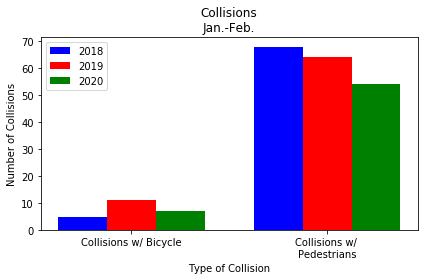

In [12]:
#Plot Jan-Feb 2018-2020 data

groups = 2

year18 =(bike_crashes18, ped_crashes18)

year19 = (bike_crashes19, ped_crashes19)

year20 = (bike_crashes20, ped_crashes20)

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.25

bar1 = plt.bar(index, year18, bar_width, color='b', label="2018")

bar2 = plt.bar(index + bar_width, year19, bar_width, color='r', label="2019")

bar3 = plt.bar(index + bar_width + bar_width, year20, bar_width, color='g', label="2020")

plt.xlabel('Type of Collision')
plt.ylabel('Number of Collisions')
plt.title('Collisions\nJan.-Feb.')
plt.xticks(index + bar_width, ('Collisions w/ Bicycle', 'Collisions w/ \nPedestrians', 'Collisions w/ \nOther Vehicle'))
plt.legend()
plt.tight_layout()
#plt.savefig("Bar3.png")

In [22]:
#How do number of injuries/deaths due to collisions vary over the course of a day?
#Line plot - collision count per hour and death count per hour
#Assigned to: Alex

#Create new data frame to work with
df = pd.DataFrame(collision)

#Split the date_time column into two columns
date_time = df.date_time.str.split(expand=True)

date_time = date_time.rename(columns={0:'date', 1:'time'})
date_time

#Change time column to datetime64 type. Allows to pull out the hour.
date_time['time'] = pd.to_datetime(date_time.time)
date_time.dtypes

#Pull out the hour of the time column.
time = date_time.time.dt.hour
time

# Pull out the injured and killed columns out of the main datafram
casualties = df[["injured","killed"]]
casualties_df =pd.DataFrame(casualties)
casualties_df

# Merge injured, killed, and time columns
cas_hour = casualties_df.merge(time, left_index=True, right_index=True)

cas_hour = cas_hour[["injured", "killed","time"]]

cas_hour = pd.DataFrame(cas_hour)

cas_hour


,injured,killed,time
0,0,0,0
1,0,0,1
2,0,1,1
3,0,0,2
4,0,0,2
...,...,...,...
21752,1,0,7
21753,0,0,7
21754,0,0,12
21755,2,0,17


In [23]:
# Bin hour labels to dataframe
bins = [0, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12.9, 13.9, 14.9, 15.9, 16.9, 17.9, 18.9,
       19.9, 20.9, 21.9, 22.9, 24]

labels = ['12am-1am', '1am-2am', '2am-3am', '3am-4am', '4am-5am', '5am-6am', '6am-7am',
         '7am-8am', '8am-9am', '9am-10am', '10am-11am', '11am-12pm', '12pm-1pm', '1pm-2pm',
         '2pm-3pm', '3pm-4pm', '4pm-5pm', '5pm-6pm', '6pm-7pm', '7pm-8pm', '8pm-9pm',
         '9pm-10pm', '10pm-11pm', '11pm-12am']


cas_hour['Hour'] = pd.cut(cas_hour.time, bins=bins, labels=labels)

final_hour = cas_hour.fillna("12am-1am")

final_hour


,injured,killed,time,Hour
0,0,0,0,12am-1am
1,0,0,1,1am-2am
2,0,1,1,1am-2am
3,0,0,2,2am-3am
4,0,0,2,2am-3am
...,...,...,...,...
21752,1,0,7,7am-8am
21753,0,0,7,7am-8am
21754,0,0,12,12pm-1pm
21755,2,0,17,5pm-6pm


In [27]:
#Groupby time 

grouped_data = final_hour.groupby("time")

#Run sum function on grouped data to show the total number of injuries for hours of the day and set to pandas df. 
injured_data = grouped_data['injured'].sum()
injured_data = pd.DataFrame(injured_data)
injured_data = pd.DataFrame(injured_data)
injured_df = injured_data.reset_index()
injured_df

#Run sum function on grouped data to show the total number of deaths for hours of the day and set to pandas df. 
killed_data = grouped_data['killed'].sum()
killed_data = pd.DataFrame(killed_data)
killed_df = killed_data.reset_index()
killed_df

#Groupby Hour to get the Hour column groupby.
hour_data = final_hour.groupby("Hour")
hour_df = hour_data["injured"].sum()
hour = hour_df.reset_index()
hour

,Hour,injured
0,12am-1am,316
1,1am-2am,187
2,2am-3am,184
3,3am-4am,101
4,4am-5am,88
5,5am-6am,152
6,6am-7am,314
7,7am-8am,576
8,8am-9am,593
9,9am-10am,533


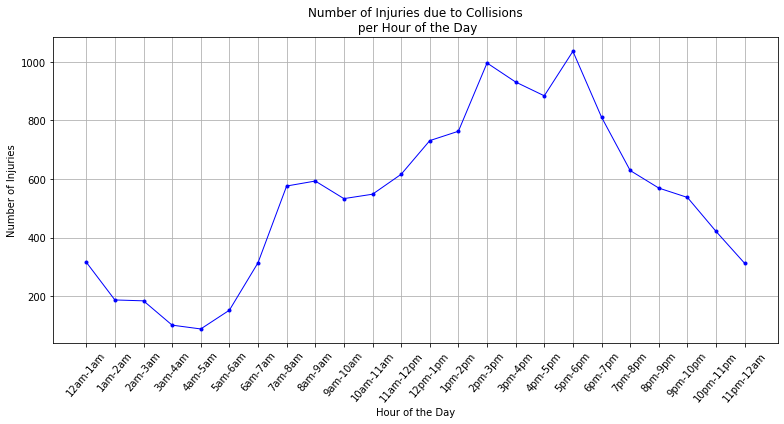

In [28]:
#Plot line graph for injury data

plt.figure(figsize=(11,6))

x_axis = injured_df.time

y_axis = injured_df.injured

plt.plot(x_axis, y_axis, marker=".", color="blue", linewidth=1)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, hour.Hour, rotation=50)

plt.title("Number of Injuries due to Collisions\n per Hour of the Day")

plt.xlabel("Hour of the Day")

plt.ylabel("Number of Injuries")

plt.grid()

plt.tight_layout()

#plt.savefig("Line1.png")

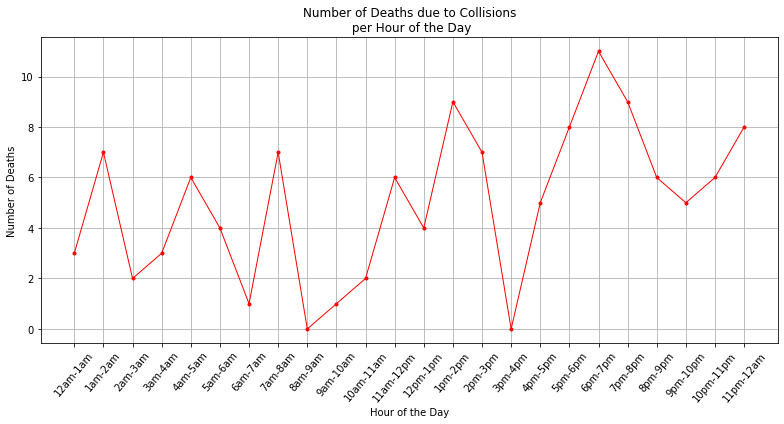

In [29]:
#Plot line graph for injury data

plt.figure(figsize=(11,6))

x_axis = killed_df.time

y_axis = killed_df.killed

plt.plot(x_axis, y_axis, marker=".", color="red", linewidth=1)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, hour.Hour, rotation=50)

plt.title("Number of Deaths due to Collisions\n per Hour of the Day")

plt.xlabel("Hour of the Day")

plt.ylabel("Number of Deaths")

plt.grid()

plt.tight_layout()

#plt.savefig("Line2.png")